In [2]:
#%pip install RDKit

In [3]:
from rdkit import Chem

In [4]:
m = Chem.MolFromSmiles('Cc1ccccc1')

In [5]:
m.GetNumAtoms()

7

In [6]:
m.GetBonds()

In [7]:
m.GetNumBonds()

7

In [8]:
Chem.MolToInchi(m)

'InChI=1S/C7H8/c1-7-5-3-2-4-6-7/h2-6H,1H3'

In [9]:
from rdkit.Chem import Draw
from rdkit.Chem.Draw import SimilarityMaps

In [10]:
m1 = Chem.MolFromSmiles('OC(=O)C1=CC=CC(O)=C1O')
m2 = Chem.MolFromSmiles('OC1=CC=CC=C1O')

In [11]:
fp = SimilarityMaps.GetAPFingerprint(m1, fpType = 'normal')
fp = SimilarityMaps.GetTTFingerprint(m1, fpType='normal')
fp = SimilarityMaps.GetMorganFingerprint(m1, fpType='bv')

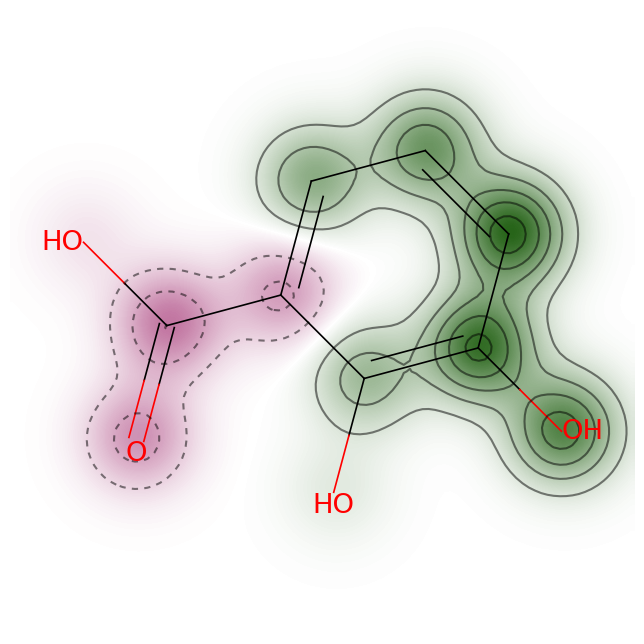

In [12]:
fig, maxweight = SimilarityMaps.GetSimilarityMapForFingerprint(m2, m1, SimilarityMaps.GetMorganFingerprint)

In [13]:
from rdkit.Chem import Descriptors
m = Chem.MolFromSmiles('OC(=O)C1=CC=CC(O)=C1O')
print(Descriptors.TPSA(m))
37.3
print(Descriptors.MolLogP(m))


77.76
0.7959999999999998


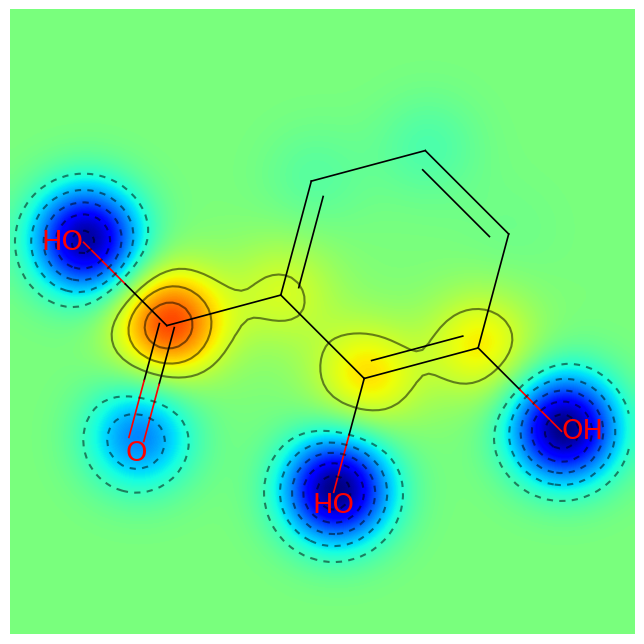

In [14]:
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import SimilarityMaps
mol = Chem.MolFromSmiles('OC(=O)C1=CC=CC(O)=C1O')
AllChem.ComputeGasteigerCharges(mol)
contribs = [mol.GetAtomWithIdx(i).GetDoubleProp('_GasteigerCharge') for i in range(mol.GetNumAtoms())]
fig = SimilarityMaps.GetSimilarityMapFromWeights(mol, contribs, colorMap='jet', contourLines=10)



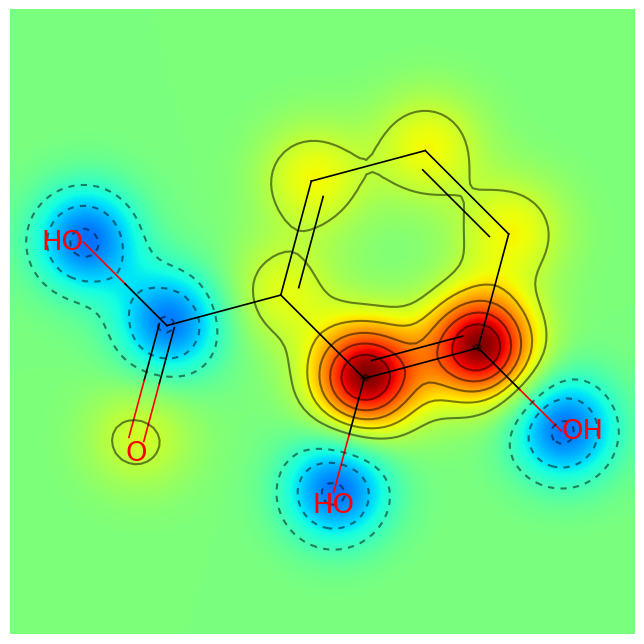

In [15]:
from rdkit.Chem import rdMolDescriptors
contribs = rdMolDescriptors._CalcCrippenContribs(mol)
fig = SimilarityMaps.GetSimilarityMapFromWeights(mol,[x for x,y in contribs], colorMap='jet', contourLines=10)

In [16]:
from rdkit import Chem
from rdkit.Chem import ChemicalFeatures
>>> fdefName = 'data/MinimalFeatures.fdef'
>>> featFactory = ChemicalFeatures.BuildFeatureFactory(fdefName)

SyntaxError: invalid syntax (2469604116.py, line 3)

In [28]:
from rdkit import DataStructs
m1 = Chem.MolFromSmiles('OC(=O)C1=CC=CC(O)=C1O')
m2 = Chem.MolFromSmiles('OC1=CC=CC=C1O')

In [30]:
from rdkit.Chem import AllChem
fp1 = AllChem.GetMorganFingerprint(m1,2)
fp2 = AllChem.GetMorganFingerprint(m2,2)
DataStructs.DiceSimilarity(fp1,fp2)

0.5490196078431373

In [31]:
from rdkit.Chem import PandasTools
import pandas as pd
import os
from rdkit import RDConfig
antibiotics = pd.DataFrame(columns=['Name','Smiles'])
antibiotics = antibiotics.append({'Smiles':'CC1(C(N2C(S1)C(C2=O)NC(=O)CC3=CC=CC=C3)C(=O)O)C',
  'Name':'Penicilline G'}, ignore_index=True)#Penicilline G
antibiotics = antibiotics.append({
  'Smiles':'CC1(C2CC3C(C(=O)C(=C(C3(C(=O)C2=C(C4=C1C=CC=C4O)O)O)O)C(=O)N)N(C)C)O',
  'Name':'Tetracycline'}, ignore_index=True)#Tetracycline
antibiotics = antibiotics.append({
  'Smiles':'CC1(C(N2C(S1)C(C2=O)NC(=O)C(C3=CC=CC=C3)N)C(=O)O)C',
  'Name':'Ampicilline'}, ignore_index=True)#Ampicilline
print([str(x) for x in  antibiotics.columns])
['Name', 'Smiles']
print(antibiotics)

['Name', 'Smiles']
            Name                                             Smiles
0  Penicilline G    CC1(C(N2C(S1)C(C2=O)NC(=O)CC3=CC=CC=C3)C(=O)O)C
1   Tetracycline  CC1(C2CC3C(C(=O)C(=C(C3(C(=O)C2=C(C4=C1C=CC=C4...
2    Ampicilline  CC1(C(N2C(S1)C(C2=O)NC(=O)C(C3=CC=CC=C3)N)C(=O...


C:\Users\josin\AppData\Local\Temp\ipykernel_632\4012545122.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  antibiotics = antibiotics.append({'Smiles':'CC1(C(N2C(S1)C(C2=O)NC(=O)CC3=CC=CC=C3)C(=O)O)C',
C:\Users\josin\AppData\Local\Temp\ipykernel_632\4012545122.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  antibiotics = antibiotics.append({
C:\Users\josin\AppData\Local\Temp\ipykernel_632\4012545122.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  antibiotics = antibiotics.append({


In [32]:
PandasTools.AddMoleculeColumnToFrame(antibiotics,'Smiles','Molecule',includeFingerprints=True)
print([str(x) for x in  antibiotics.columns])
['Name', 'Smiles', 'Molecule']

['Name', 'Smiles', 'Molecule']


['Name', 'Smiles', 'Molecule']

In [34]:
beta_lactam = Chem.MolFromSmiles('C1C(=O)NC1')
beta_lactam_antibiotics = antibiotics[antibiotics['Molecule'] >= beta_lactam]
print(beta_lactam_antibiotics[['Name','Smiles']])


            Name                                             Smiles
0  Penicilline G    CC1(C(N2C(S1)C(C2=O)NC(=O)CC3=CC=CC=C3)C(=O)O)C
2    Ampicilline  CC1(C(N2C(S1)C(C2=O)NC(=O)C(C3=CC=CC=C3)N)C(=O...


In [35]:
import sys, _compat_pickle
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [38]:
trainset_file = sys.argv[1]
testset_file = sys.argv[2]
trainset = [x for x in Chem.SDMolSupplier(trainset_file)]
testset = [x for x in Chem.SDMolSupplier(testset_file)]

OSError: File error: Bad input file --ip=127.0.0.1

GOOD TRY

In [1]:
import pandas as pd
import numpy as np
import pubchempy as pcp

In [29]:
chunks = pd.read_csv('CID_properties_nr.csv', chunksize=100)

In [30]:
list_of_dfs = []
for df in chunks:
    list_of_dfs.append(df)

In [86]:
first_1000_drugs = list_of_dfs[0]
first_1000_drugs.head()
first_1000_drugs.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CID                 100 non-null    int64  
 1   HBondAcceptorCount  100 non-null    int64  
 2   HBondDonorCount     100 non-null    int64  
 3   IsomericSMILES      100 non-null    object 
 4   MolecularWeight     100 non-null    float64
 5   XLogP               70 non-null     float64
 6   drug_class          100 non-null    object 
 7   desalted_SMILES     100 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 6.4+ KB


In [93]:
list_of_comp_fp = []
for cid in first_1000_drugs['CID']:
    comp = pcp.Compound.from_cid(cid)
    list_of_comp_fp.append(comp.fingerprint)
list_of_comp_fp

['00000371E0730000001800000000000000000000000000000000000000000000000000000000001C00400000014800C100040200030000000000000000000000000000000000000800200000020080000400000000000000011000000000000000000000000000000000000000000000000000',
 '00000371E073B8000010000000000000000000000001000000003C4000000000000000B1F000001E0050080001A81CE196063DC8B2C81200A80134F76C0282802531122409D8A17874B88970F6C0D8D19464086DB002C9CA37530000000000800005000028000100000A000050000000000000',
 '00000371C0730000401000000000000000000000000162000000300000000000100000010000001C0440000001AC28C55804B10083000008A002204224008210016000140988000804A8086022809911942000608000888A171080800E02000000000000000400000000000000000000000000',
 '00000371E07A00000010000000000000000000000000000000003060C1830000000000010000001C0050000001AD28C1100430C082C000008000244240008200002102040888800864A8082022C09191842008609000C8CA171080C00E00002000000000001000440000040000000000000000',
 '00000371C0630000000000000000000000000000000000000000000000

In [33]:
fingerprints_df = pd.concat(list_of_comp_dfs)
fingerprints_df

,cid,fingerprint,cactvs_fingerprint
0,24769,00000371E0730000001800000000000000000000000000...,1110000001110011000000000000000000000000000110...
0,134694070,00000371E073B800001000000000000000000000000100...,1110000001110011101110000000000000000000000100...
0,5121,00000371C0730000401000000000000000000000000162...,1100000001110011000000000000000001000000000100...
0,4660557,00000371E07A0000001000000000000000000000000000...,1110000001111010000000000000000000000000000100...
0,122175,00000371C0630000000000000000000000000000000000...,1100000001100011000000000000000000000000000000...
...,...,...,...
0,101290189,00000371F07E3C00000000000000000000000000000162...,1111000001111110001111000000000000000000000000...
0,16220095,00000371F07B3800000000000000000000000000000162...,1111000001111011001110000000000000000000000000...
0,129627791,00000371F07FFE00000000000000000000000000000162...,1111000001111111111111100000000000000000000000...
0,71774773,00000371F07FFC02040000100000000000000000000162...,1111000001111111111111000000001000000100000000...


In [91]:
drugs_clean = first_1000_drugs.merge(fingerprints_df, left_on='CID', right_on='cid')

In [45]:
type(drugs_clean.cactvs_fingerprint.loc[0])

str

In [49]:
bin(int(drugs_clean.cactvs_fingerprint.loc[0]))

'0b1010111010000110001100010001101100000000000010011011110000110110001110101111111000101101001111100010000001010001101010100010001011100001001110111100010101011001110111011001001110000101001000011000000010001100001101110111001010010100111001011001101100000001010110001011011001011110011100001000111101101000100101100100000010001110100010001001010000110011000111110000011011010010010001100101011001001001000010000001100011001101100111001000001000001000011110001000000000110001001100111101010111001100001000111000111111101110101101101110010011111000100110000001010001111001001110101100101011010001000100001110101000011101011100010001111001010101100000100100101100110110011000100011000010101001001110110100111101100011101010010110110000010100110001111110010000011011000011100000011101010101100000000001100010010101101101011011011110110110100010001111111000111110101011000000010100000000100010000111000001000001010100101010111101000101001010011010001100010101111001011110101000011100001010101100111001001

In [94]:
drugs_clean['fingerprint'] = drugs_clean['fingerprint'].apply(lambda x: bin(int(x)))


ValueError: invalid literal for int() with base 10: '00000371E0730000001800000000000000000000000000000000000000000000000000000000001C00400000014800C10004020003000000000000000000000000000000000000080020000002008000040000000000000001100000000000000000000

In [62]:
type(drugs_clean['cactvs_fingerprint'].loc[0])

str

In [56]:
col.info

<bound method Series.info of 0     0b10101110100001100011000100011011000000000000...
1     0b10101110100001100011000100011011000000000000...
2     0b10101100111100111010111110000010100100010010...
3     0b10101110100001100011000100011011000000001011...
4     0b10101100111100111010111110000010100010100110...
                            ...                        
95    0b10101110101011100111000101000011110110001010...
96    0b10101110101011100111000101000011110110001001...
97    0b10101110101011100111000101000011110110001010...
98    0b10101110101011100111000101000011110110001010...
99    0b10101110101011100111000101000011110110001010...
Name: cactvs_fingerprint, Length: 100, dtype: object>

In [79]:
p = pcp.Compound.from_cid(118701645)

In [ ]:
print(p.fingerprint)

'00000371F07A3802000000000000000000000000000160000000306000000000000000010000001E08000820000D28F99807320883000730884221D218800200002000000888018800881A20328091308660002486009C880798D9F28E80000000000000000000000000000000000000000000'

In [81]:
bin(int(p.fingerprint, 16))

'0b1101110001111100000111101000111000000000100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001011000000000000000000000000000000011000001100000000000000000000000000000000000000000000000000000000000000000000100000000000000000000000000011110000010000000000000001000001000000000000000001101001010001111100110011000000001110011001000001000100000110000000000000111001100001000100001000010001000011101001000011000100000000000001000000000000000000010000000000000000000000000100010001000000000011000100000000000100010000001101000100000001100101000000010010001001100001000011001100000000000000010010010000110000000001001110010001000000001111001100011011001111100101000111010000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000'

In [110]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X = drugs_clean[['cactvs_fingerprint']]
y = drugs_clean['drug_class']

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.3, random_state= 42)

In [111]:
X

,cactvs_fingerprint
0,1110000001110011000000000000000000000000000110...
1,1110000001110011101110000000000000000000000100...
2,1100000001110011000000000000000001000000000100...
3,1110000001111010000000000000000000000000000100...
4,1100000001100011000000000000000000000000000000...
...,...
95,1111000001111110001111000000000000000000000000...
96,1111000001111011001110000000000000000000000000...
97,1111000001111111111111100000000000000000000000...
98,1111000001111111111111000000001000000100000000...


In [112]:
y

0        hematologic
1             cardio
2      antiinfective
3                cns
4     antineoplastic
           ...      
95     antiinfective
96     antiinfective
97     antiinfective
98       hematologic
99       hematologic
Name: drug_class, Length: 100, dtype: object

In [113]:
drugs_clean

,CID,HBondAcceptorCount,HBondDonorCount,IsomericSMILES,MolecularWeight,XLogP,drug_class,desalted_SMILES,cid,fingerprint,cactvs_fingerprint
0,24769,2,0,CN(C)CCCCCCN(C)C.C(CBr)CBr,374.205,NaN,hematologic,BrCCCBr.CN(C)CCCCCCN(C)C,24769,00000371E0730000001800000000000000000000000000...,1110000001110011000000000000000000000000000110...
1,134694070,9,6,C1CN=C(N1)NC2=C(C3=NC=CN=C3C=C2)Br.[C@@H](C(C(...,442.226,NaN,cardio,Brc1c(NC2=NCCN2)ccc2nccnc12,134694070,00000371E073B800001000000000000000000000000100...,1110000001110011101110000000000000000000000100...
2,5121,2,0,C1CSC2=NC(CN21)C3=CC=C(C=C3)Br,283.187,2.5,antiinfective,Brc1ccc(C2CN3CCSC3=N2)cc1,5121,00000371C0730000401000000000000000000000000162...,1100000001110011000000000000000001000000000100...
3,4660557,1,1,C1C2CC3CC1CC(C2)C3NC4=CC=C(C=C4)Br,306.247,5.0,cns,Brc1ccc(NC2C3CC4CC(C3)CC2C4)cc1,4660557,00000371E07A0000001000000000000000000000000000...,1110000001111010000000000000000000000000000100...
4,122175,2,2,CC(CCC(C#C)N)N,126.203,-0.4,antineoplastic,C#CC(N)CCC(C)N,122175,00000371C0630000000000000000000000000000000000...,1100000001100011000000000000000000000000000000...
...,...,...,...,...,...,...,...,...,...,...,...
95,101290189,9,3,C[C@H]1CC[C@]2(C[C@@H]3C[C@H](O2)C/C=C(\C[C@H]...,637.770,3.2,antiinfective,C/C1=C/C[C@@H]2C[C@@H](C[C@]3(CC[C@H](C)[C@@H]...,101290189,00000371F07E3C00000000000000000000000000000162...,1111000001111110001111000000000000000000000000...
96,16220095,8,2,C[C@@H]1/C=C\C(=O)NC/C=C\C(=C/[C@H](CC(=O)CC2=...,525.602,2.5,antiinfective,C/C1=C/[C@@H](O)CC(=O)Cc2nc(co2)C(=O)N2CCC=C2C...,16220095,00000371F07B3800000000000000000000000000000162...,1111000001111011001110000000000000000000000000...
97,129627791,19,6,CCC1C(=O)N2CCCC2C(=O)N(C(C(=O)N3CCC(=O)CC3C(=O...,1349.506,NaN,antiinfective,C/C1=C/[C@@H](O)CC(=O)Cc2nc(co2)C(=O)N2CCC=C2C...,129627791,00000371F07FFE00000000000000000000000000000162...,1111000001111111111111100000000000000000000000...
98,71774773,20,12,[HH].CC1=CC2=C(C=C1C)N(C=N2)C3C(C(C(O3)CO)OP(=...,1385.859,NaN,hematologic,C/C1=C2/N=C(/C=C3\N/C(=C(/C)C4=NC(C)(C5N=C1C(C...,71774773,00000371F07FFC02040000100000000000000000000162...,1111000001111111111111000000001000000100000000...


In [114]:
rfc = RandomForestClassifier()

In [115]:
rfc.fit(X_train, X_test)
rfc.predict(X_test)

ValueError: Input X contains infinity or a value too large for dtype('float32').